# 1. Math Drills

Give an example of a binary relation on a set which is

1. Reflexive and symmetric, but not transitive  
2. Reflexive, but neither symmetric nor transitive  
3. Symmetric, but neither reflexive nor transitive  
4. Transitive, but neither reflexive nor symmetric  

Recall the definitions from the lectures if you need to!

1) Reflexive and symmetric, but not transitive

Set = {1, 2, 3}

- Relation = {(1, 1),(1, 2),(2, 1),(2, 2),(3, 3),(2, 3),(3, 2)}

2) Reflexive, but neither symmetric not transitive

Set = {a, b, c, d} 

- Relation = {(a, a), (a, c), (b, b), (b, b), (c, c), (c, d), (d, d)}

3) Symmetric, but neither reflexive nor transitive

Set = {1, 2, 3}

- Relation = {(1, 2), (2, 1), (2, 3), (3, 2)}

4) Transitive, but neither refelxive nor symmetric

Set = {a, b, c}

- Relation = {(a, b), (b, c), (a, c)}

# Exercise 2: A bunch of Math!

## 2.0 Polynomial

Consider the polynomial

$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Write a function `p` such that `p(x, coeff)` that computes the value in given a point `x` and a list of coefficients `coeff`.

```
p(5, [1, 1]) = 1 + 5 = 6
p(5, [2, 1, 1]) = 2 + 5 + 25 = 31
```

In [6]:
def p(x, coeff):
    '''
    Create new variable n and keep adding 1 to it as the exponents increase, while a count variable does the polynomial math
    '''
    n = 0
    count = 0
    for i in coeff:
        count = count + (i * (x**n))
        n += 1
    return count

p(5, [2, 1, 1])

32

# 2.1 Variance

Define a function named `var` that takes a list of numbers and computes the variance. The variance is:

$$variance(x) = ∑_i(x_i − average(x))^2$$

Don't cheat and use `numpy.var`! You should only use that function to test that your function is correct

In [21]:
def var(x):
    '''
    - Calculate the mean
    - Then for each number in x, subtract the mean and then square the result
        - Create an empty list z and append the squared differences to z
    - Then return the average of the squared differences
    '''
    mean = sum(x)/len(x)
    z = []
    for i in x:
        z.append((i - mean)**2)
    return sum(z)/len(x)


x = [600, 470, 170, 430, 300]
var(x)

21704.0

In [22]:
import numpy as np
x = [600, 470, 170, 430, 300]
np.var(x)

21704.0

# 2.2 RMSE

Calculate the root mean squared error (RMSE) of a machine learning model's output. The function takes in two lists: one with actual values, one with predictions. The formula for RMSE is:

$$RMSE(y_1, y_2) = \sqrt{\dfrac{1}{N} \sum_{i=1}^N (y_{1i} - y_{2i})^2}$$

```
    rmse([1, 2], [1, 2]) = 0
    rmse([1, 2, 3], [3, 2, 1]) = 1.63
```

You can use 

```
sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
```

To test your function

In [43]:
import math

def rmse(x, y):
    '''
    - Square the residuals
    - Find the average of the residuals
    - Take the square root of the result
    '''
    z = []
    zipped = zip(x,y)
    for x, y in zipped:
        z.append((x - y) ** 2)
        
    mean = sum(z)/len(z)
    
    return (math.sqrt(mean))

rmse([1, 2, 3], [3, 2, 1])

1.632993161855452

In [47]:
from sklearn import metrics

sklearn.metrics.mean_squared_error([1,2,3], [3,2,1], squared=False)

1.632993161855452

# 2.3 Jaccard Similarity

The Jaccard similarity between two sets is the size of intersection divided by the size of union. Write a function that computes it:

$$jaccard(A, B) = \dfrac{|A \cap B|}{|A \cup B|}$$


```
jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4
```



In [52]:
def jaccard(x, y):
    '''
    Divide len(intersection) by len(union)
    '''
    intersection = x.intersection(y)
    union = x.union(y)
    
    return len(intersection)/len(union)

jaccard({'a', 'b', 'c'}, {'a', 'd'})

0.25

# Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.  
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.  
1. If not, pay nothing.  


Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.  


Use no import besides `from numpy.random import uniform`.

In [63]:
from numpy.random import uniform

#First function

def coin_flip(x):
    '''
    - Set counter equal 0 and add to it whenever count = x, which can only happen if u (using np.uniform) < 0.5
    '''
    paid = 0
    count = 0
    for i in range(x):
        u = np.random.uniform()
        count += 1 if u < 0.5 else 0
        if count == x:
            paid += 1
            
    return paid

coin_flip(10)

0

In [94]:
#Second function

def coin_flip2(x):
    paid = 0
    count = 0
    for i in range(x):
        u = np.random.uniform()
        count = count + (1 if u < 0.5 else 0)
        if count == x:
            paid += 1
            
    return paid

coin_flip2(10)

0

# Exercise 4: Logistic Map fixed point

The **Logistic Map** is a famous function from Chaos Theory which is defined as:

$$x_{t+1} = r \cdot x_t(1−x_t)$$

with the conditions:

$$x_0 ∈ [0,1], r ∈[0,4]$$

Write a lambda $logistic(x, r)$, that's successively applied to itself through a second function `logistic_n_times(x0, f, r, n)`

Make a few runs of this for various values of `x0` and `r`. Answer the following:

- Can you find a fixed point? 

- At what values of `r` are there fixed points? 

- Are there any ranges of input for which the function is an attractor?

In [6]:
import numpy as np
#Lamda logistic function
f = lambda x, r: r * x * (1 - x)

#Defining logistic n times function
def logistic_n_times(x0, f, r, n):
    for i in range(n):
        x0 = f(x0, r)
    print(x0)
    return x0

#Fixed points at 0 and 0.5
#Fixed poinits when r = 0 and r = 2

In [7]:
print((logistic_n_times(0, f, 3, 10)))
print((logistic_n_times(0.1, f, 3, 10)))
print((logistic_n_times(0.2, f, 3, 10)))
print((logistic_n_times(0.3, f, 3, 10)))
print((logistic_n_times(0.4, f, 3, 10)))
print((logistic_n_times(0.5, f, 3, 10)))
print((logistic_n_times(0.6, f, 3, 10)))
print((logistic_n_times(0.7, f, 3, 10)))
print((logistic_n_times(0.8, f, 3, 10)))
print((logistic_n_times(0.9, f, 3, 10)))
#No fixed points

0
0
0.6108732301324811
0.6108732301324811
0.7214025477865863
0.7214025477865863
0.6968966829892789
0.6968966829892789
0.6169344141830806
0.6169344141830806
0.6025729979246489
0.6025729979246489
0.6169344141830806
0.6169344141830806
0.6968966829892789
0.6968966829892789
0.7214025477865863
0.7214025477865863
0.6108732301324807
0.6108732301324807


In [8]:
print((logistic_n_times(0, f, 2, 10)))
print((logistic_n_times(0.1, f, 2, 10)))
print((logistic_n_times(0.2, f, 2, 10)))
print((logistic_n_times(0.3, f, 2, 10)))
print((logistic_n_times(0.4, f, 2, 10)))
print((logistic_n_times(0.5, f, 2, 10)))
print((logistic_n_times(0.6, f, 2, 10)))
print((logistic_n_times(0.7, f, 2, 10)))
print((logistic_n_times(0.8, f, 2, 10)))
print((logistic_n_times(0.9, f, 2, 10)))

#Can see fixed points at r = 2, same for r = 0

0
0
0.5
0.5
0.49999999999999994
0.49999999999999994
0.49999999999999994
0.49999999999999994
0.5
0.5
0.5
0.5
0.5
0.5
0.49999999999999994
0.49999999999999994
0.5
0.5
0.5
0.5


# Exercise 5 (stretch): Famous Chaos Theory Plot 

There is a famous plot in chaos theory of the logistic map that relates values of the attractors in $x_t$ for values of $r$, detailing where the function tends to "end up" for each value of $r$.

<img src="logistic map.png" style="width: 400px;">

Reproduce this plot using the `matplotlib` package.

**Hint:** Produce samples from the function to fill arrays on the x and y axis!

**Hint:** Take the final 50 values in a series of data points produced by the function!

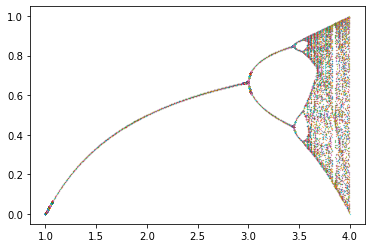

In [41]:
#https://youtu.be/1ApX-OHGOdw?list=LL

'''
- For each value of r, plot the unique values for the last 50 values of x. 
- Use for loop to loop over the values of n and then use another for loop outside to loop over all values of r
'''
import numpy as np
import matplotlib.pyplot as plt

N = 500
x = 0.5 + np.zeros(N)
R = np.linspace(1, 4, 1000)
last50 = np.arange(int(N* 0.9), N) #to plot the last 50 

for i in range(len(R)):
    for n in range(N - 1):
        x[n+1] = R[i] * x[n]* (1- x[n])
    
    u = np.unique(x[last50]) #use np.unique to get rid of repeated values
    r = R[i] * np.ones(len(u)) #need a repitition of r
    plt.plot(r, u, '.', markersize = 0.5)
    
plt.show()
        